In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cluster_utils as utl
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
group1 = ['data/89-90.csv', 'data/90-91.csv',
          'data/91-92.csv', 'data/92-93.csv', 'data/93-94.csv']

group2 = ['data/94-95.csv', 'data/95-96.csv',
          'data/96-97.csv', 'data/97-98.csv', 'data/98-99.csv']

group3 = ['data/99-00.csv', 'data/00-01.csv',
          'data/01-02.csv', 'data/02-03.csv', 'data/03-04.csv']

group4 = ['data/05-06.csv', 'data/06-07.csv',
          'data/07-08.csv', 'data/08-09.csv', 'data/09-10.csv']

group5 = ['data/10-11.csv', 'data/11-12.csv',
          'data/12-13.csv', 'data/13-14.csv', 'data/14-15.csv']

group6 = ['data/15-16.csv', 'data/16-17.csv',
          'data/17-18.csv', 'data/18-19.csv', 'data/19-20.csv']

group1 = utl.combine_seasons(group1)
group2 = utl.combine_seasons(group2)
group3 = utl.combine_seasons(group3)
group4 = utl.combine_seasons(group4)
group5 = utl.combine_seasons(group5)
group6 = utl.combine_seasons(group6)

In [3]:
# loading players
g1f = pd.read_csv('cluster_results/final_clusters/g1_f.csv')
g1d = pd.read_csv('cluster_results/final_clusters/g1_d.csv')

g2f = pd.read_csv('cluster_results/final_clusters/g2_f.csv')
g2d = pd.read_csv('cluster_results/final_clusters/g2_d.csv')

g3f = pd.read_csv('cluster_results/final_clusters/g3_f.csv')
g3d = pd.read_csv('cluster_results/final_clusters/g3_d.csv')

g4f = pd.read_csv('cluster_results/final_clusters/g4_f.csv')
g4d = pd.read_csv('cluster_results/final_clusters/g4_d.csv')

g5f = pd.read_csv('cluster_results/final_clusters/g5_f.csv')
g5d = pd.read_csv('cluster_results/final_clusters/g5_d.csv')

g6f = pd.read_csv('cluster_results/final_clusters/g6_f.csv')
g6d = pd.read_csv('cluster_results/final_clusters/g6_d.csv')

In [4]:
# loading goons
goon1 = pd.read_csv('data/goons/goon1.csv')
goon2 = pd.read_csv('data/goons/goon2.csv')
goon3 = pd.read_csv('data/goons/goon3.csv')
goon4 = pd.read_csv('data/goons/goon4.csv')
goon5 = pd.read_csv('data/goons/goon5.csv')
goon6 = pd.read_csv('data/goons/goon6.csv')

goon_list1 = goon1['Player'].unique()
goon_list2 = goon2['Player'].unique()
goon_list3 = goon3['Player'].unique()
goon_list4 = goon4['Player'].unique()
goon_list5 = goon5['Player'].unique()
goon_list6 = goon6['Player'].unique()

In [5]:
# adding goon indicator to final dfs
df_list = [g1f, g1d, g2f, g2d, g3f, g3d, g4f, g4d, g5f, g5d, g6f, g6d,
           group1, group2, group3, group4, group5, group6]

for df in df_list:
    df['goon'] = 0

g1f.loc[g1f.Player.isin(goon_list1), "goon"] = int(1)
g1d.loc[g1d.Player.isin(goon_list1), "goon"] = int(1)
group1.loc[group1.Player.isin(goon_list1), "goon"] = int(1)

g2f.loc[g2f.Player.isin(goon_list2), "goon"] = int(1)
g2d.loc[g2d.Player.isin(goon_list2), "goon"] = int(1)
group2.loc[group2.Player.isin(goon_list2), "goon"] = int(1)

g3f.loc[g3f.Player.isin(goon_list3), "goon"] = int(1)
g3d.loc[g3d.Player.isin(goon_list3), "goon"] = int(1)
group3.loc[group3.Player.isin(goon_list3), "goon"] = int(1)

g4f.loc[g4f.Player.isin(goon_list4), "goon"] = int(1)
g4d.loc[g4d.Player.isin(goon_list4), "goon"] = int(1)
group4.loc[group4.Player.isin(goon_list4), "goon"] = int(1)

g5f.loc[g5f.Player.isin(goon_list5), "goon"] = int(1)
g5d.loc[g5d.Player.isin(goon_list5), "goon"] = int(1)
group5.loc[group5.Player.isin(goon_list5), "goon"] = int(1)

g6f.loc[g6f.Player.isin(goon_list6), "goon"] = int(1)
g6d.loc[g6d.Player.isin(goon_list6), "goon"] = int(1)
group6.loc[group6.Player.isin(goon_list6), "goon"] = int(1)


print(len(group1))
group1 = group1[group1['goon'] != 1]
group2 = group2[group2['goon'] != 1]
group3 = group3[group3['goon'] != 1]
group4 = group4[group4['goon'] != 1]
group5 = group5[group5['goon'] != 1]
group6 = group6[group6['goon'] != 1]


873


### Analysis

#### Points distributions for goons by era

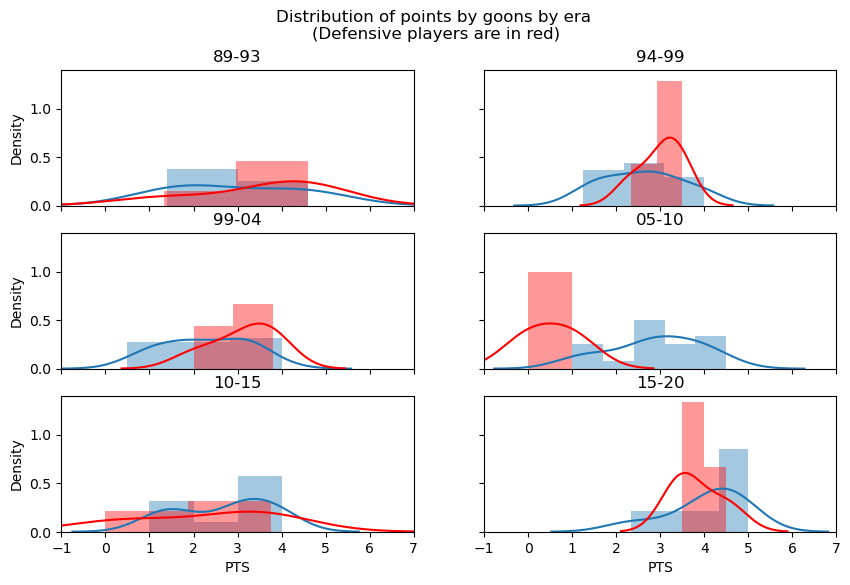

In [6]:
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 6))

# row1
sns.distplot( g1f.loc[g1f['goon'] == 1]['PTS'], label="Ok", ax=ax[0,0])
sns.distplot( g1d.loc[g1d['goon'] == 1]['PTS'], color="red", label="OK", ax=ax[0,0])

sns.distplot( g2f.loc[g2f['goon'] == 1]['PTS'] , label="Ok", ax=ax[0,1])
sns.distplot( g2d.loc[g2d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[0,1])

# row2
sns.distplot( g3f.loc[g3f['goon'] == 1]['PTS'] , label="Ok", ax=ax[1,0])
sns.distplot( g3d.loc[g3d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[1,0])

sns.distplot( g4f.loc[g4f['goon'] == 1]['PTS'] , label="Ok", ax=ax[1,1])
sns.distplot( g4d.loc[g4d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[1,1])

#r ow 3
sns.distplot( g5f.loc[g5f['goon'] == 1]['PTS'] , label="Ok", ax=ax[2,0])
sns.distplot( g5d.loc[g5d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[2,0])

sns.distplot( g6f.loc[g6f['goon'] == 1]['PTS'] , label="Ok", ax=ax[2,1])
sns.distplot( g6d.loc[g6d['goon'] == 1]['PTS'] , color="red", label="OK", ax=ax[2,1])

# setting plot lims
ax[0,0].set_xlim([-1,7])
ax[0,0].set_xticks(range(-1,8))

# setting titles
ax[0,0].set_title('89-93')
ax[0,1].set_title('94-99')

ax[1,0].set_title('99-04')
ax[1,1].set_title('05-10')

ax[2,0].set_title('10-15')
ax[2,1].set_title('15-20')

plt.suptitle('Distribution of points by goons by era \n(Defensive players are in red)')
plt.savefig('figs/final_plots/points_dist_era.png')

plt.show()

#### Number of goons by era

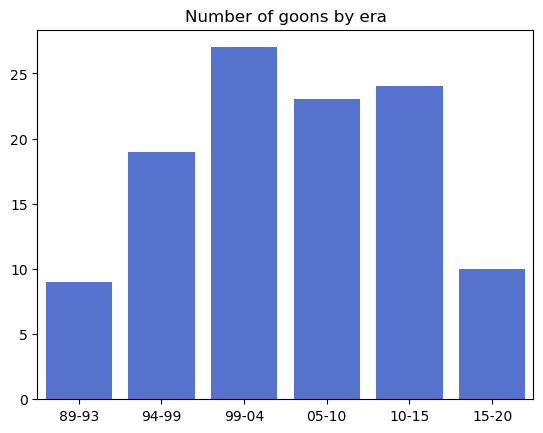

In [7]:
goon_bar = {'89-93': len(goon_list1),
            '94-99': len(goon_list2),
            '99-04': len(goon_list3),
            '05-10': len(goon_list4),
            '10-15': len(goon_list5),
            '15-20': len(goon_list6),
}

sns.barplot(x=list(goon_bar.keys()), y=list(goon_bar.values()), color='royalblue')

plt.title('Number of goons by era')
plt.savefig('figs/final_plots/num_goons_era.png')
plt.show()

#### PIM per season by era

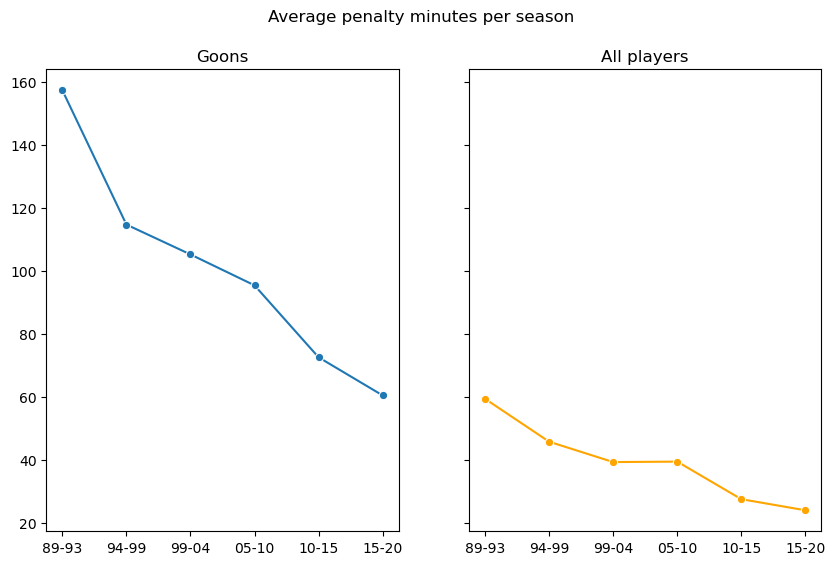

In [8]:
# goon PIM per game by year
goon_pims = {}
goon_dfs = [goon1, goon2, goon3, goon4,goon5, goon6]
labels =['89-93', '94-99', '99-04', '05-10', '10-15', '15-20']
for i in range(len(goon_dfs)):
    df = goon_dfs[i]

    pim_avg = df.PIM.sum() / len(df)#df.GP.sum()

    goon_pims[labels[i]] = pim_avg

# non-goon PIMS
pims = {}
group_dfs = [group1, group2, group3, group4, group5, group6]
for i in range(len(group_dfs)):
    df = group_dfs[i]

    pim_avg = df.PIM.sum() / len(df)#df.GP.sum()

    pims[labels[i]] = pim_avg

# plotting PIMS
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

sns.lineplot(x=list(goon_pims.keys()), y=list(goon_pims.values()), marker='o', ax=ax[0])
sns.lineplot(x=list(pims.keys()), y=list(pims.values()), color='orange', marker='o', ax=ax[1])

ax[0].set_title('Goons')
ax[1].set_title('All players')

plt.suptitle("Average penalty minutes per season")
plt.savefig('figs/final_plots/pim_season.png')

plt.show()


#### Points per season by era

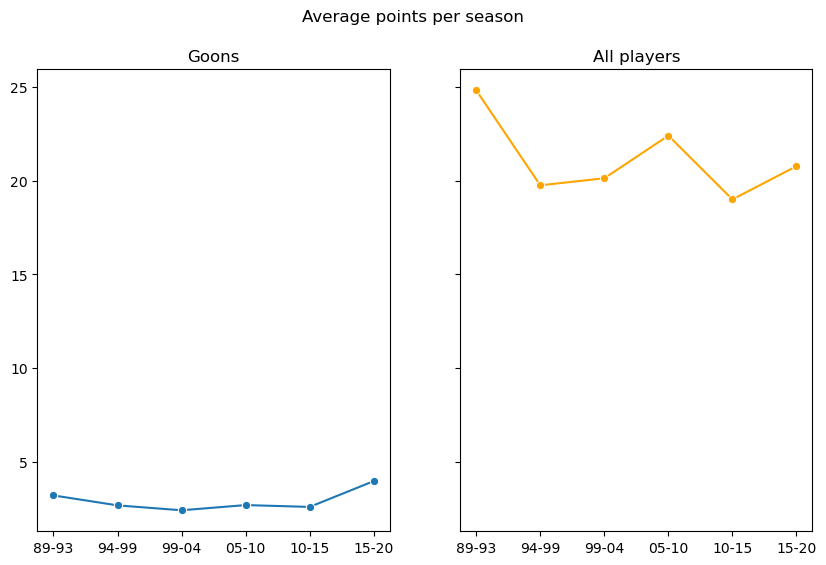

In [9]:
goon_pts = {}
goon_dfs = [goon1, goon2, goon3, goon4,goon5, goon6]
labels =['89-93', '94-99', '99-04', '05-10', '10-15', '15-20']
for i in range(len(goon_dfs)):
    df = goon_dfs[i]

    pts_avg = df.PTS.sum() / len(df)

    goon_pts[labels[i]] = pts_avg

# non-goon PIMS
pts = {}
group_dfs = [group1, group2, group3, group4, group5, group6]
for i in range(len(group_dfs)):
    df = group_dfs[i]

    pts_avg = df.PTS.sum() / len(df)

    pts[labels[i]] = pts_avg

# plotting PIMS
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

sns.lineplot(x=list(goon_pts.keys()), y=list(goon_pts.values()), marker='o', ax=ax[0])
sns.lineplot(x=list(pts.keys()), y=list(pts.values()), color='orange', marker='o', ax=ax[1])

ax[0].set_title('Goons')
ax[1].set_title('All players')

plt.suptitle("Average points per season")
plt.savefig('figs/final_plots/pts_season.png')

plt.show()

#### Points and Penalty Minutes by era and position

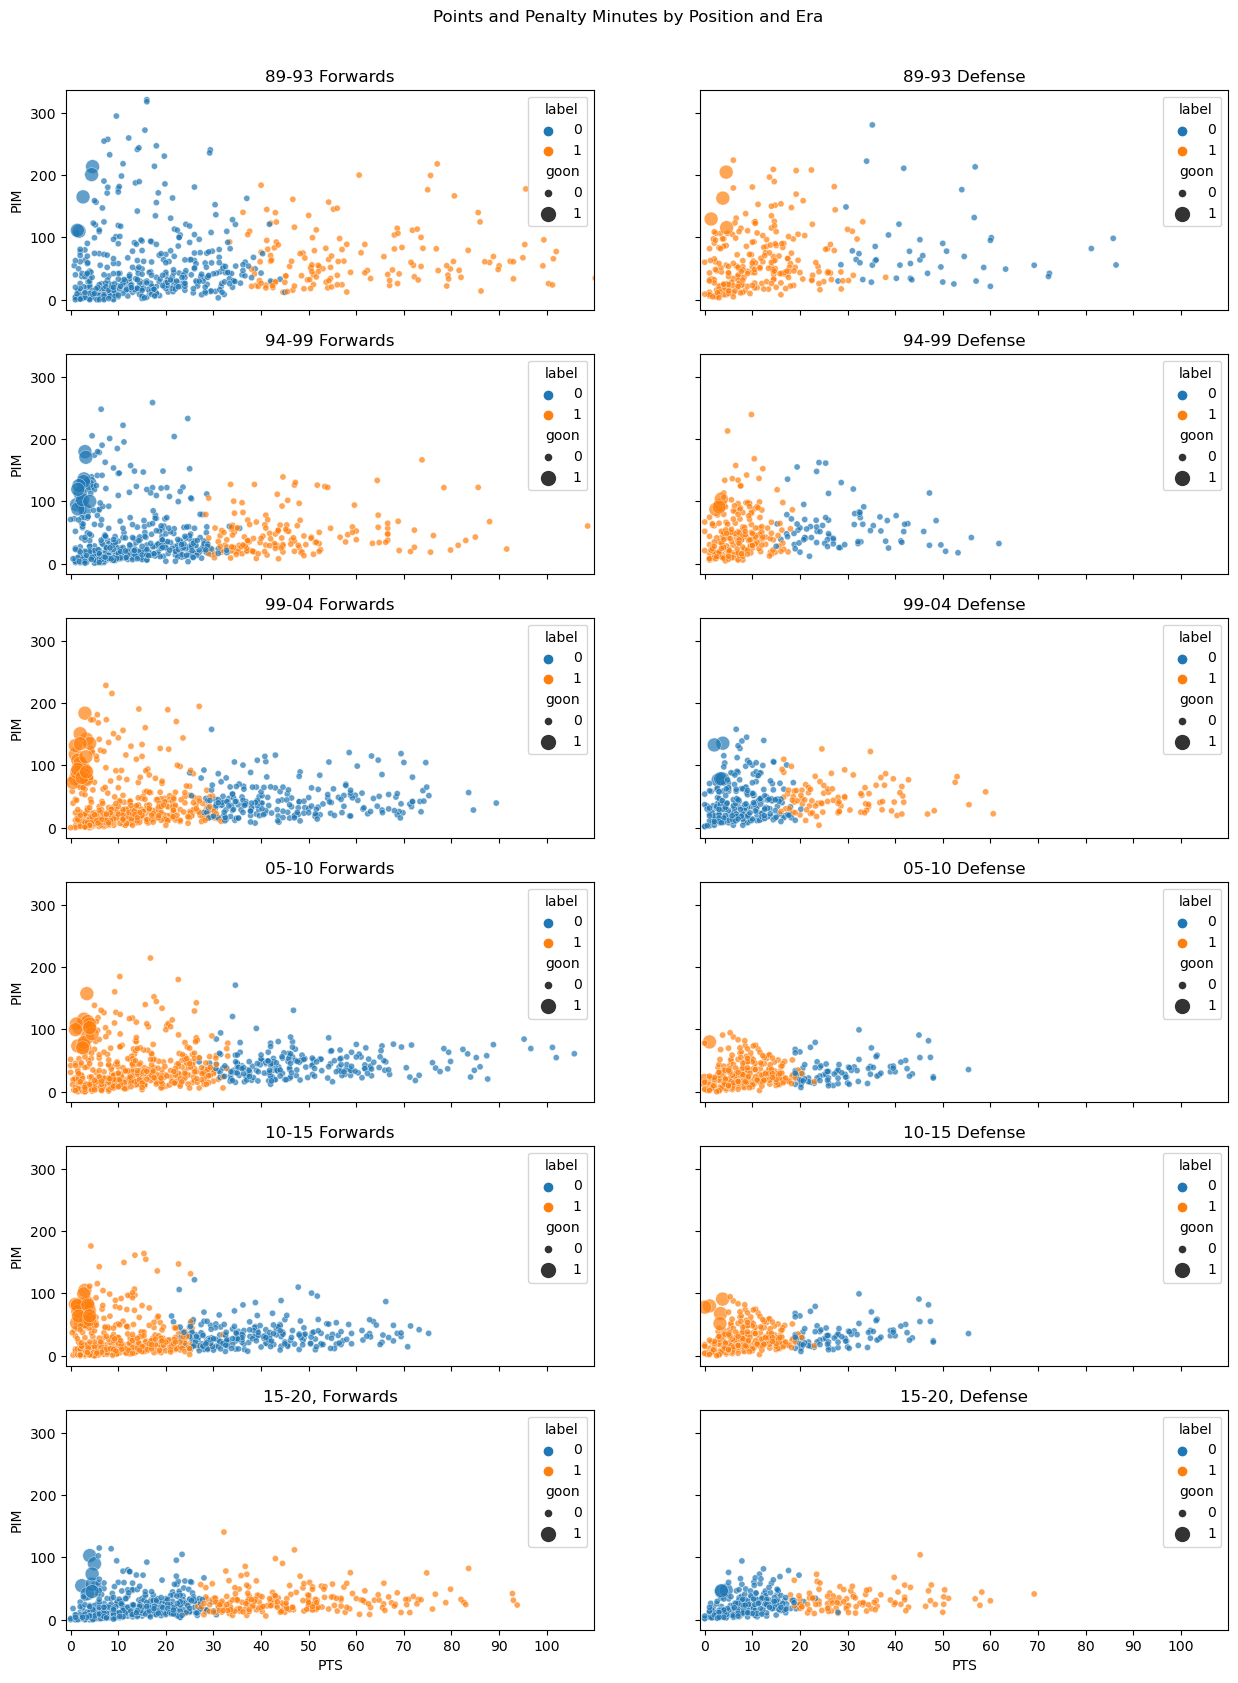

In [10]:
fig, ax = plt.subplots(6, 2, sharex=True, sharey=True, figsize=(15,20))

# group1
sns.scatterplot(data = g1f, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[0,0])
sns.scatterplot(data = g1d, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[0,1])

# group2
sns.scatterplot(data = g2f, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[1,0])
sns.scatterplot(data = g2d, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[1,1])

# group3
sns.scatterplot(data = g3f, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[2,0])
sns.scatterplot(data = g3d, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[2,1])

# group4
sns.scatterplot(data = g4f, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[3,0])
sns.scatterplot(data = g4d, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[3,1])

# group5
sns.scatterplot(data = g5f, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[4,0])
sns.scatterplot(data = g5d, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[4,1])

# group6
sns.scatterplot(data = g6f, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[5,0])
sns.scatterplot(data = g6d, x='PTS', y='PIM', hue='label', alpha=.7, size='goon', sizes=[20, 100], ax=ax[5,1])

# setting plot lims
ax[0,0].set_xlim([-1,110])
ax[0,0].set_xticks([0,10,20,30,40,50,60,70,80,90,100])

# setting titles
ax[0,0].set_title('89-93 Forwards')
ax[0,1].set_title('89-93 Defense')

ax[1,0].set_title('94-99 Forwards')
ax[1,1].set_title('94-99 Defense')

ax[2,0].set_title('99-04 Forwards')
ax[2,1].set_title('99-04 Defense')

ax[3,0].set_title('05-10 Forwards')
ax[3,1].set_title('05-10 Defense')

ax[4,0].set_title('10-15 Forwards')
ax[4,1].set_title('10-15 Defense')

ax[5,0].set_title('15-20, Forwards')
ax[5,1].set_title('15-20, Defense')

plt.suptitle('Points and Penalty Minutes by Position and Era', y=0.92)
plt.savefig('figs/final_plots/points_pims_era.png')

plt.show()